Hello Everyone! This is group 9 final project. This notebook was created with the help of the following group members: Molisha Khosla, Marcelle Tamegnon and Krish Chauhan. The Methods we utilized were CNN, VGG16 and ANN. Data Loading was performed with the help of OS Library and manual imported data to folders already created in directory /content/

In [ ]:
# All my import for libraries I will use in data processing and loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import random

Setting up my directories for importing the image (MARCELLE)

In [ ]:
path = '/content/'
# In my files tab, all the folders and data is made or stored inside /content/ path, copy and you will see first says content
data_path = path.split(os.sep)
# Get the current working directory and split it into its components
main_path = os.getcwd().split(os.sep)

os.listdir(os.sep.join(data_path))
# Please make sure it reads the positive and negative folder and shows below in output just to confirm it recognize it

['.config', 'sample_data']

Before you start with this project, You must make two folders where you will insert your images in. One should be called positive with positive brain scan images and one will be called negative with negative brain scan images

In [ ]:
# /content/positive: make this folder
positive_dir = data_path + ["positive"]
# /content/negative: make this folder
negative_dir = data_path + ["negative"]

For the next block, if you recieve an error, you did not put the data in the negative and positive files, so it cannot make random image with nothing

DATA VISUALIZING -----------------------------------------------------------------------------------------------------------------------------------------------

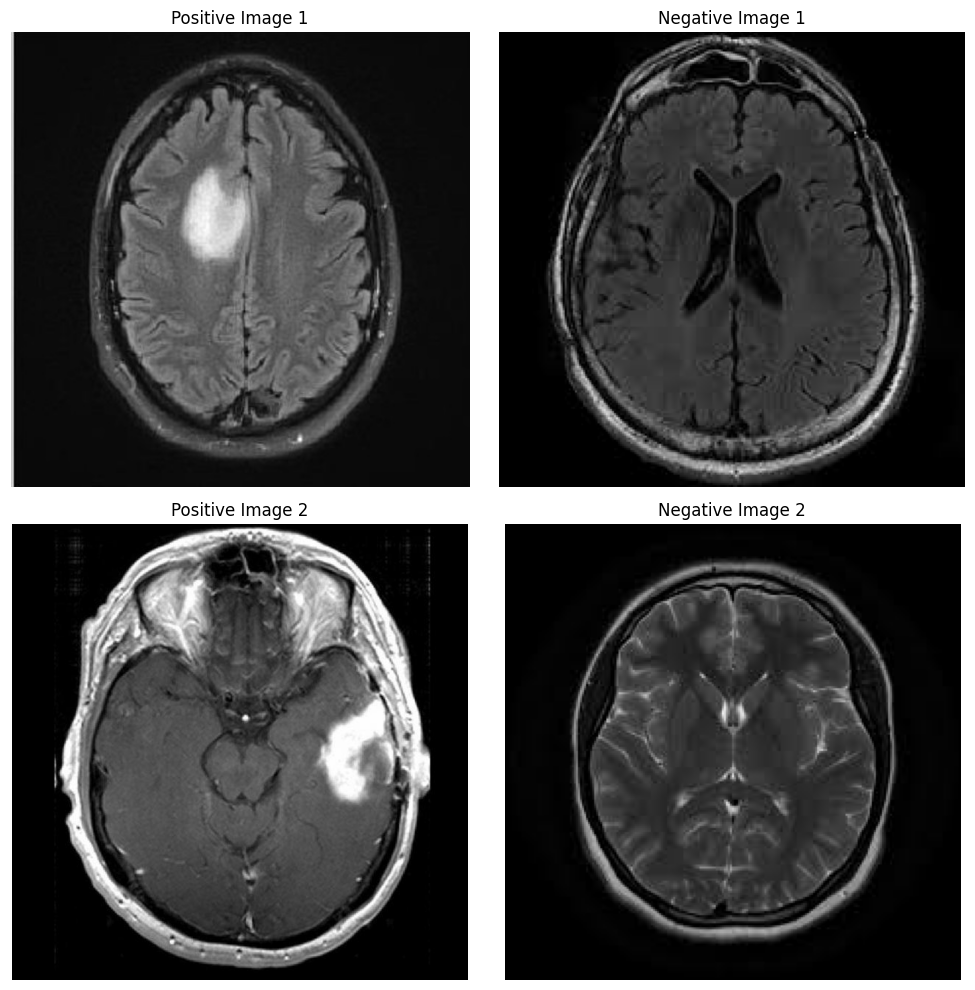

In [ ]:
# You do not need to do random, I could select first one from each directory
random_positive_images = random.sample(os.listdir(os.sep.join(positive_dir)), 2)
random_negative_images = random.sample(os.listdir(os.sep.join(negative_dir)), 2)

# Stored the images randomly selected
pos_img_1 = plt.imread(os.sep.join(positive_dir + [random_positive_images[0]]))
pos_img_2 = plt.imread(os.sep.join(positive_dir + [random_positive_images[1]]))
neg_img_1 = plt.imread(os.sep.join(negative_dir + [random_negative_images[0]]))
neg_img_2 = plt.imread(os.sep.join(negative_dir + [random_negative_images[1]]))

# Display the images in a 2x2 matrix format
plt.figure(figsize=(10, 10))

# Display the first positive image
plt.subplot(2, 2, 1)
plt.imshow(pos_img_1)
plt.title('Positive Image 1')
plt.axis('off')

# Display the second positive image
plt.subplot(2, 2, 3)
plt.imshow(pos_img_2)
plt.title('Positive Image 2')
plt.axis('off')

# Display the first negative image
plt.subplot(2, 2, 2)
plt.imshow(neg_img_1)
plt.title('Negative Image 1')
plt.axis('off')

# Display the second negative image
plt.subplot(2, 2, 4)
plt.imshow(neg_img_2)
plt.title('Negative Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

END OF DATA VISUALIZING -----------------------------------------------------------------------------------------------------------------------------------

CHAPTER 2: IMAGE GENERATOR --------------------------------------------------------------------------------------------------------------------------------------------------- (KRISH)

In [ ]:
# Define directory names for storing augmented positive and negative images
# We need to create another folder where we will store the updated images since the images we have rn will not work with my CNN model. I future on also made the images smaller because just like the lecture, if they are smaller its more easier to reach key features and the image never changes
# You could change the name of this folder, it will not change anything
gen_images_pos = 'gen_images_positive'
gen_images_neg = 'gen_images_negative'
positive_image = '/content/positive'
negative_image = '/content/negative'
# Create a directory for augmented positive images in the main path
os.mkdir(os.path.join(os.sep.join(main_path), gen_images_pos))

# Create a directory for augmented negative images in the main path
os.mkdir(os.path.join(os.sep.join(main_path), gen_images_neg))

In [ ]:
# Initialize an ImageDataGenerator for data augmentation
# Define transformations to apply on the images for augmentation
# I kept these parameters since if you increase, the image doesnt show sometimes.
datagen = ImageDataGenerator(
    rotation_range=40,          # Randomly rotate the image within a range of 40 degrees
    width_shift_range=0.2,      # Randomly shift the image width by up to 20%
    height_shift_range=0.2,     # Randomly shift the image height by up to 20%
    shear_range=0.2,            # Apply shear transformations randomly up to 20%
    zoom_range=0.2,             # Randomly zoom in the image up to 20%
    horizontal_flip=True,       # Randomly flip the image horizontally
    fill_mode='nearest'         # Fill in any missing pixels after transformation with the nearest filled value
)

BELOW CELL GENERATES 20 IMAGES OF EACH IMAGE

In [ ]:
# POSITIVE IMAGES GEN

# Loop through each file in the positive images directory
for images in os.listdir(os.sep.join(positive_dir)):
    # Construct the full image path
    img_path = os.sep.join(positive_dir + [images])

    # Load the image from the specified path
    img = load_img(img_path)

    # Convert the image to a numpy array
    x = img_to_array(img)

    # Reshape the image to have an additional dimension for batch size
    x = x.reshape((1,) + x.shape)

    # The following .flow() command generates batches of randomly transformed images.
    # It will loop indefinitely, hence we need to use a `break` statement to exit the loop.
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=os.path.join(os.sep.join(main_path), gen_images_pos),
                              save_prefix='tumor', save_format='jpeg'):
        i += 1
        # Generate 20 augmented images for each original image and then break the loop
        if i > 20:
            break

In [ ]:
# NEGATIVE IMAGE GEN

# Iterate over files in the negative images directory
for images in os.listdir(os.sep.join(negative_dir)):
    # Get image path
    img_path = os.sep.join(negative_dir + [images])

    # Load and convert the image to a numpy array
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    # Generate augmented images using .flow()
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=os.path.join(os.sep.join(main_path), gen_images_neg),
                              save_prefix='tumor', save_format='jpeg'):
        i += 1
        # Stop after creating 20 augmented images for each input
        if i > 20:
            break

WHILE THESE TWO BLOCKS OF CODE PRODUCE NEW IMAGES FROM THE ORIGINAL IMAGES, THEY ALSO STORE THESE IMAGES IN FILES gen_images_negative and gen_images_positive. With this we could easily move onto loading our data into two different categories, generated images and original images.

END OF IMAGE GENERATOR ---------------------------------------------------------------------------------------------------------------------------------------------------

START OF DATA LOADING -------------------------------------------------------------------------------------------------------------------------------------------------------(MOLISHA)

In [ ]:
def load_images_and_normalize(dir_path):
    images = []

    # Iterate over files in the directory
    for file in os.listdir(dir_path):
        img_path = os.path.join(dir_path, file)

        # Load and resize the image
        img = load_img(img_path, target_size=(150, 150))

        # Convert the image to a numpy array
        img_array = img_to_array(img)
        images.append(img_array)

    # Convert list to numpy array and normalize values to [0,1]
    images = np.array(images, dtype=np.float32) / 255.0
    return images

ORIGINAL IMAGES FIRST BELOW:

In [ ]:
original_pos_img = load_images_and_normalize(os.path.join(os.sep.join(main_path), positive_image))
original_neg_img = load_images_and_normalize(os.path.join(os.sep.join(main_path), negative_image))

NOW THE GENERATED IMAGES BELOW:

In [ ]:
generated_pos_img = load_images_and_normalize(os.path.join(os.sep.join(main_path), gen_images_pos))
generated_neg_img = load_images_and_normalize(os.path.join(os.sep.join(main_path), gen_images_neg))

END OF DATA LOADING -------------------------------------------------------------------------------------------------------------------------------------------------------------

USING SIMPLE CNN MODEL------------------------------------------------------------------------------------------------------------------------------------------------------(KRISH)

MY IMPORTS

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def simple_cnn_model(input_shape):
    model = Sequential()

    # First layer: Convolutional + Max Pooling
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second layer: Convolutional + Max Pooling + Dropout
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Third layer: Convolutional + Max Pooling
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
# Create the CNN model with input shape 150x150 and 3 channels (RGB)
model = simple_cnn_model((150, 150, 3))

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Assign labels: 1 for positive images and 0 for negative images
positive_labels = np.ones(original_pos_img.shape[0])
negative_labels = np.zeros(original_neg_img.shape[0])
# Combine images and labels into single arrays
X = np.concatenate([original_pos_img, original_neg_img])
y = np.concatenate([positive_labels, negative_labels])

In [ ]:
# Split the data into training and validation sets (80% train, 20% validation set)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model for 30 epochs with batch size of 32 and using the validation data
# This will take a couple of hours to complete for the whole 30 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history1 = model.fit(X_train, y_train, epochs=20,callbacks=[early_stop], batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
6/6 [==============================] - 13s 2s/step - loss: 5.5287 - accuracy: 0.5249 - val_loss: 3.3951 - val_accuracy: 0.6739
Epoch 2/20
6/6 [==============================] - 19s 3s/step - loss: 2.9192 - accuracy: 0.6298 - val_loss: 2.4323 - val_accuracy: 0.5870
Epoch 3/20
6/6 [==============================] - 11s 2s/step - loss: 2.1182 - accuracy: 0.7735 - val_loss: 2.0995 - val_accuracy: 0.4348
Epoch 4/20
6/6 [==============================] - 9s 1s/step - loss: 1.8363 - accuracy: 0.6906 - val_loss: 1.6345 - val_accuracy: 0.7826
Epoch 5/20
6/6 [==============================] - 11s 2s/step - loss: 1.4827 - accuracy: 0.7459 - val_loss: 1.3888 - val_accuracy: 0.8043
Epoch 6/20
6/6 [==============================] - 11s 2s/step - loss: 1.2086 - accuracy: 0.7845 - val_loss: 1.1527 - val_accuracy: 0.8043
Epoch 7/20
6/6 [==============================] - 10s 2s/step - loss: 1.0210 - accuracy: 0.7514 - val_loss: 0.9842 - val_accuracy: 0.8261
Epoch 8/20
6/6 [===================

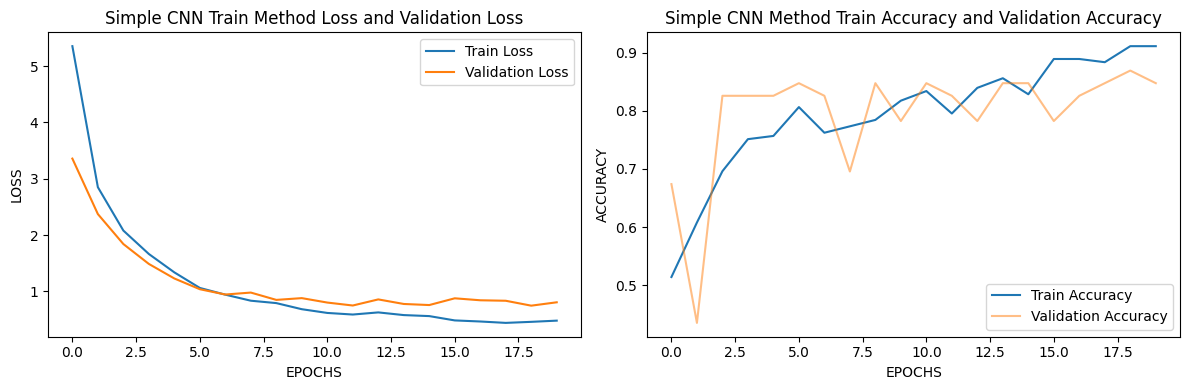

In [ ]:
# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.xlabel('EPOCHS')
plt.ylabel("LOSS")
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Simple CNN Train Method Loss and Validation Loss')
# Plot val
plt.subplot(1, 2, 2)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', alpha=0.5)
plt.legend()
plt.title('Simple CNN Method Train Accuracy and Validation Accuracy')
plt.tight_layout()
plt.show()

In [ ]:
test_loss_cnn_model, test_accuracy_cnn_model = model.evaluate(X_val, y_val)

print(f"Test Loss: {test_loss_cnn_model}")
print(f"Test Accuracy: {test_accuracy_cnn_model}")

2/2 [==============================] - 1s 173ms/step - loss: 0.8067 - accuracy: 0.8478
Test Loss: 0.8066840171813965
Test Accuracy: 0.8478260636329651


END OF CNN MODEL ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

USING VGG16 MODEL ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------(MOLISHA)

IMPORTS ------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the transfer learning model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Adjust the learning rate
optimizer = Adam(learning_rate=0.001)
model_transfer.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
X = np.concatenate([original_pos_img, original_neg_img])
y = np.concatenate([positive_labels, negative_labels])

# Shuffle the data
shuffle_index = np.random.permutation(len(X))
X_shuffled = X[shuffle_index]
y_shuffled = y[shuffle_index]

# Train-test split (you can adjust the split ratio)
split_ratio = 0.8
split_index = int(split_ratio * len(X_shuffled))

X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]

# Train the model
history = model_transfer.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 48s 9s/step - loss: 0.6412 - accuracy: 0.6042 - val_loss: 0.5585 - val_accuracy: 0.7297
Epoch 2/10
5/5 [==============================] - 57s 11s/step - loss: 0.5460 - accuracy: 0.7222 - val_loss: 0.4773 - val_accuracy: 0.7568
Epoch 3/10
5/5 [==============================] - 50s 10s/step - loss: 0.4903 - accuracy: 0.7361 - val_loss: 0.5591 - val_accuracy: 0.7027
Epoch 4/10
5/5 [==============================] - 46s 10s/step - loss: 0.5721 - accuracy: 0.6944 - val_loss: 0.4823 - val_accuracy: 0.7027
Epoch 5/10
5/5 [==============================] - 50s 11s/step - loss: 0.5447 - accuracy: 0.7153 - val_loss: 0.3776 - val_accuracy: 0.8108
Epoch 6/10
5/5 [==============================] - 49s 10s/step - loss: 0.4561 - accuracy: 0.7847 - val_loss: 0.3698 - val_accuracy: 0.8108
Epoch 7/10
5/5 [==============================] - 48s 10s/step - loss: 0.3979 - accuracy: 0.8264 - val_loss: 0.3848 - val_accuracy: 0.8649
Epoch 8/10
5/5 [============

In [ ]:
import pickle

In [ ]:
pickle.dump(model_transfer, open("model.pkl", "wb"))

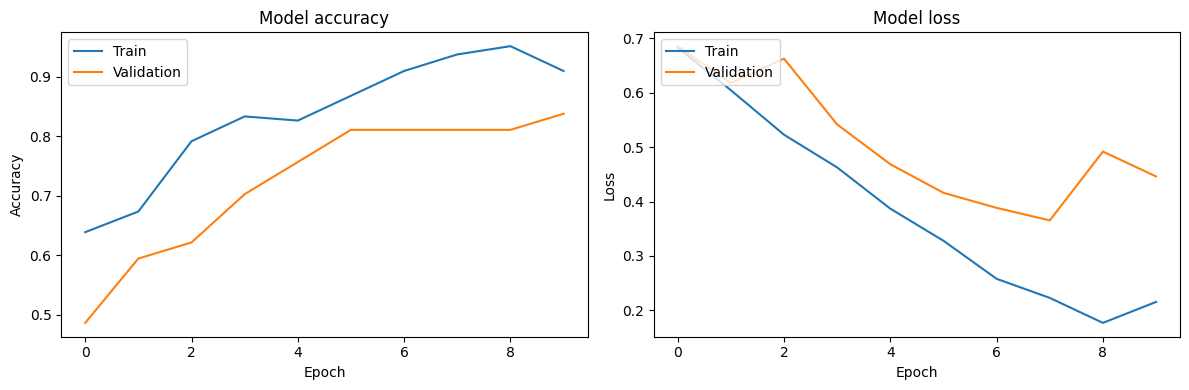

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model_transfer.evaluate(X_val, y_val)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


2/2 [==============================] - 12s 3s/step - loss: 0.3042 - accuracy: 0.8696
Test Loss: 0.3042219281196594
Test Accuracy: 0.8695651888847351


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model_transfer.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred_binary)
recall = recall_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix1 = confusion_matrix(y_val, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix1)

2/2 [==============================] - 18s 5s/step
Precision: 0.8787878787878788
Recall: 0.9354838709677419
F1 Score: 0.90625
Confusion Matrix:
[[11  4]
 [ 2 29]]


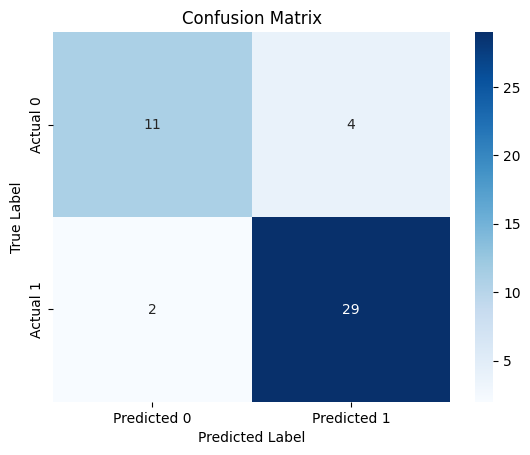

In [ ]:
import seaborn as sns
# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

END OF VGG16 MODEL ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

USING ANN MODEL --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------(MARCELLE)

MY IMPORTS

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit AlexNet's input size
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
model = models.alexnet(pretrained=True)
num_classes = 2  # Positive and negative classes
model.classifier[6] = nn.Linear(4096, num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 45.3MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Define a simple neural network class

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hyperparameters
input_size = 150 * 150 * 3  # Adjusted for the size of your input images
hidden_size = 128
output_size = 2  # Positive and negative classes
learning_rate = 0.001
num_epochs = 10
train_accuracy_list = []
train_loss_list = []
val_accuracy_list = []
val_loss_list = []

# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.reshape(-1, input_size)).float()
y_train_tensor = torch.from_numpy(y_train.astype(np.int64))
X_val_tensor = torch.from_numpy(X_val.reshape(-1, input_size)).float()
y_val_tensor = torch.from_numpy(y_val.astype(np.int64))

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Create an instance of the neural network
model = SimpleNN(input_size, hidden_size, output_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Validation loop
    model.eval()
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            _, predicted_val = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_loss = total_val_loss / len(val_loader)
    val_accuracy = correct_val / total_val

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2%}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2%}")
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

Epoch 1/10
Train Loss: 0.6733, Train Accuracy: 64.64%
Validation Loss: 0.5811, Validation Accuracy: 67.39%
Epoch 2/10
Train Loss: 0.6418, Train Accuracy: 56.91%
Validation Loss: 0.5484, Validation Accuracy: 69.57%
Epoch 3/10
Train Loss: 0.6055, Train Accuracy: 66.85%
Validation Loss: 0.5621, Validation Accuracy: 82.61%
Epoch 4/10
Train Loss: 0.5845, Train Accuracy: 72.93%
Validation Loss: 0.4725, Validation Accuracy: 84.78%
Epoch 5/10
Train Loss: 0.5600, Train Accuracy: 74.59%
Validation Loss: 0.4421, Validation Accuracy: 84.78%
Epoch 6/10
Train Loss: 0.5082, Train Accuracy: 75.69%
Validation Loss: 0.5204, Validation Accuracy: 69.57%
Epoch 7/10
Train Loss: 0.5046, Train Accuracy: 77.90%
Validation Loss: 0.4124, Validation Accuracy: 84.78%
Epoch 8/10
Train Loss: 0.4571, Train Accuracy: 80.66%
Validation Loss: 0.3968, Validation Accuracy: 84.78%
Epoch 9/10
Train Loss: 0.4378, Train Accuracy: 80.66%
Validation Loss: 0.3895, Validation Accuracy: 86.96%
Epoch 10/10
Train Loss: 0.4069, Train

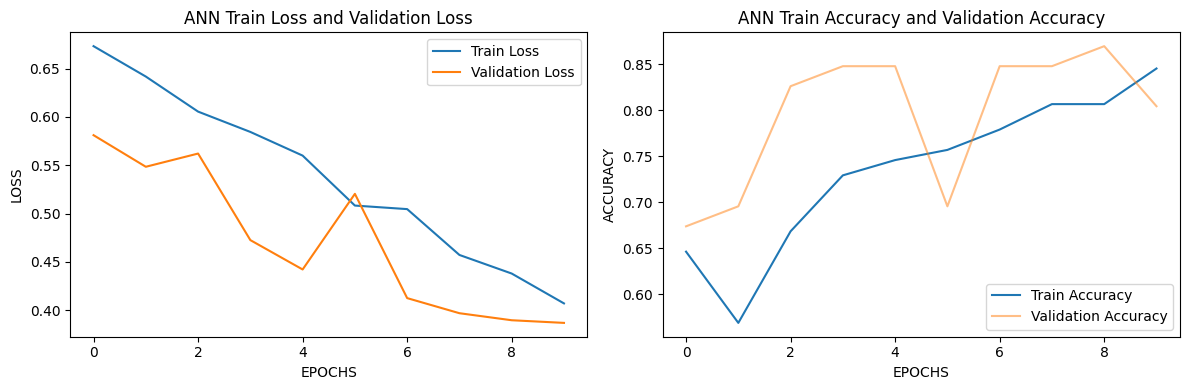

In [ ]:
no plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.xlabel('EPOCHS')
plt.ylabel("LOSS")
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.legend()
plt.title('ANN Train Loss and Validation Loss')

# Plot val
plt.subplot(1, 2, 2)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(train_accuracy_list, label='Train Accuracy')
plt.plot(val_accuracy_list, label='Validation Accuracy', alpha=0.5)
plt.legend()
plt.title('ANN Train Accuracy and Validation Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
print(f"Test Loss: {val_loss}")
print(f"Test Accuracy: {val_accuracy}")

Test Loss: 0.38674047589302063
Test Accuracy: 0.8043478260869565


ENDING ANN MODEL ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

WHICH MODEL PERFORMED BEST?

CNN Method results:


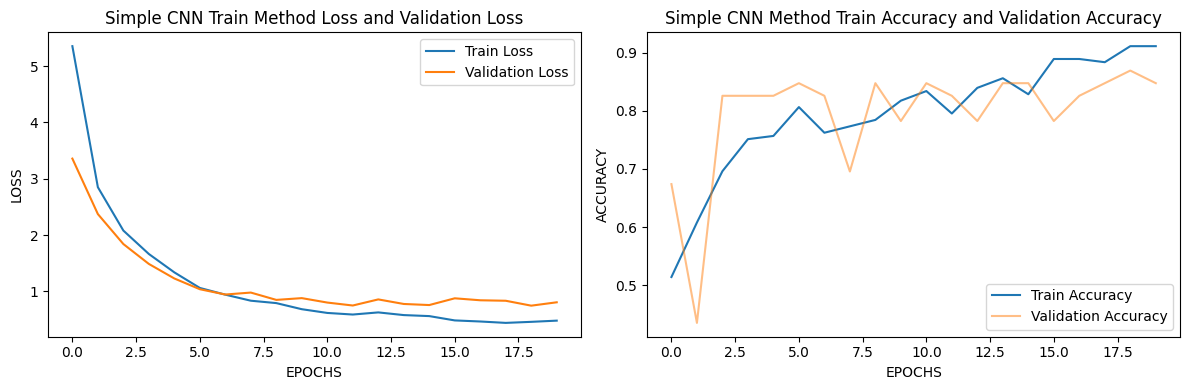

VGG-16 Method results:


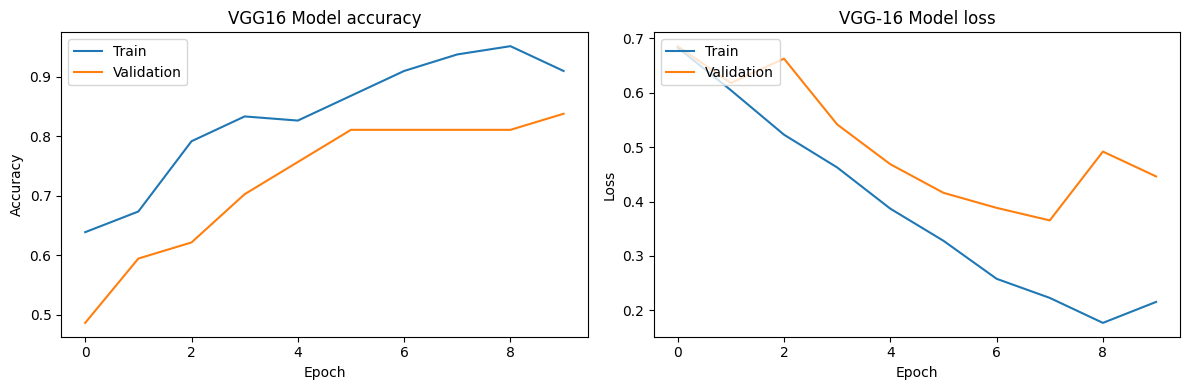

ANN Method results:


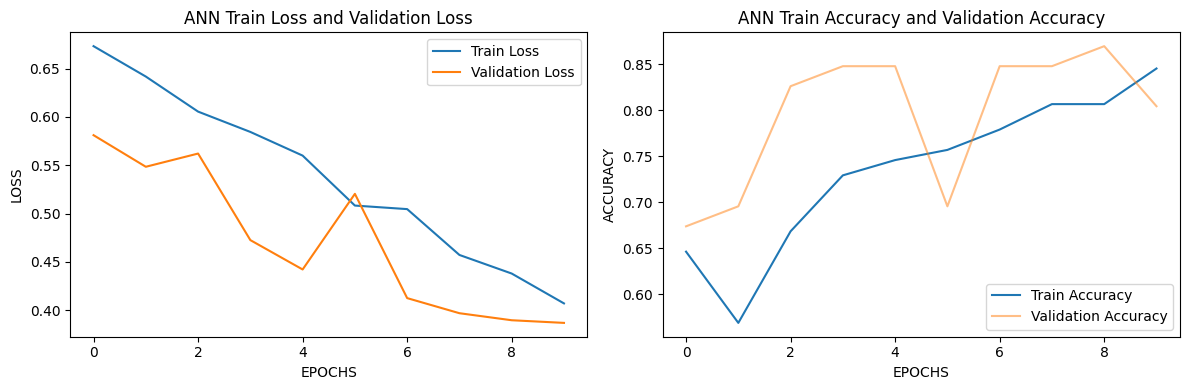

In [ ]:
# Lets re-access, shall we?

# Below are the graphs of all the models:

print("CNN Method results:")

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.xlabel('EPOCHS')
plt.ylabel("LOSS")
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Simple CNN Train Method Loss and Validation Loss')
# Plot val
plt.subplot(1, 2, 2)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', alpha=0.5)
plt.legend()
plt.title('Simple CNN Method Train Accuracy and Validation Accuracy')
plt.tight_layout()
plt.show()

print("VGG-16 Method results:")

plt.figure(figsize=(12, 4))

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG-16 Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

print("ANN Method results:")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.xlabel('EPOCHS')
plt.ylabel("LOSS")
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.legend()
plt.title('ANN Train Loss and Validation Loss')

# Plot val
plt.subplot(1, 2, 2)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(train_accuracy_list, label='Train Accuracy')
plt.plot(val_accuracy_list, label='Validation Accuracy', alpha=0.5)
plt.legend()
plt.title('ANN Train Accuracy and Validation Accuracy')

plt.tight_layout()
plt.show()


After looking at both test loss and accuracy as well with the graph depicted above, it is safe to say the best method or model for this model is the VGG-16! Created my Molisha Khosla. (Explain Why)

Since Molisha's Model Performed the Best, we will move forward with her model to deploy our model as web appliication
